In [1]:
import numpy as np
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import mnist
import matplotlib.pyplot as plt


In [2]:
(input_train, _), (input_test, _) = mnist.load_data()

In [3]:
input_train.shape, input_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
# Reshape
input_train = input_train.reshape(input_train.shape[0], -1)
input_test = input_test.reshape(input_test.shape[0], -1)

In [5]:
input_train.shape, input_test.shape

((60000, 784), (10000, 784))

In [6]:
# input_train[0]

In [7]:
# Normalization
input_train = input_train / 255
input_test = input_test / 255

In [8]:
# input_train[0]

In [9]:
# Model
def build_autoencoder(latent_features, input_shape=784):
  model = Sequential()

  # Encoder
  model.add(Dense(256, activation='relu', input_shape=(input_shape,)))
  model.add(Dense(64, activation='relu'))

  # Code
  model.add(Dense(latent_features, activation='relu'))

  # Decoder
  model.add(Dense(64, activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(units=input_shape, activation='sigmoid'))

  # Compile
  model.compile(optimizer='adam',
              loss='binary_crossentropy')

  return model

In [10]:
# Train AE
latent_features = 4
epochs=20
batch_size=128

autoencoder = build_autoencoder(latent_features, input_train.shape[1])
history = autoencoder.fit(input_train,
                          input_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          validation_split=0.2,
                          verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.3037 - val_loss: 0.1886
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1826 - val_loss: 0.1717
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1701 - val_loss: 0.1660
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1650 - val_loss: 0.1621
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1612 - val_loss: 0.1598
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1589 - val_loss: 0.1583
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1575 - val_loss: 0.1568
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1561 - val_loss: 0.1561
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1550 - val_loss: 0.1551
Epoch 10/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1539 - val_loss: 0.1540
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1530 - val_loss: 0.1531
Epoch 12/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/st

In [11]:
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         201,488 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,308,350 (4.99 MB)

 Trainable params: 436,116 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 872,234 (3.33 MB)

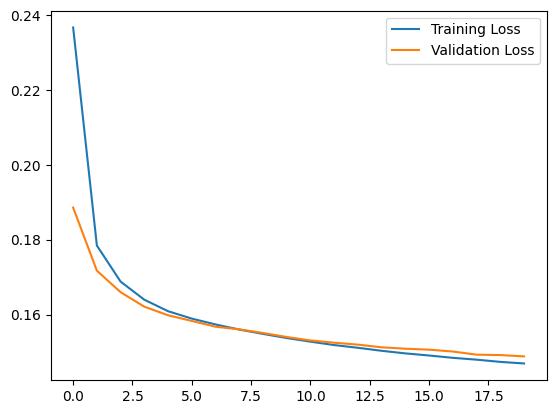

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [13]:
# Visualization
decoded_imgs = autoencoder.predict(input_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


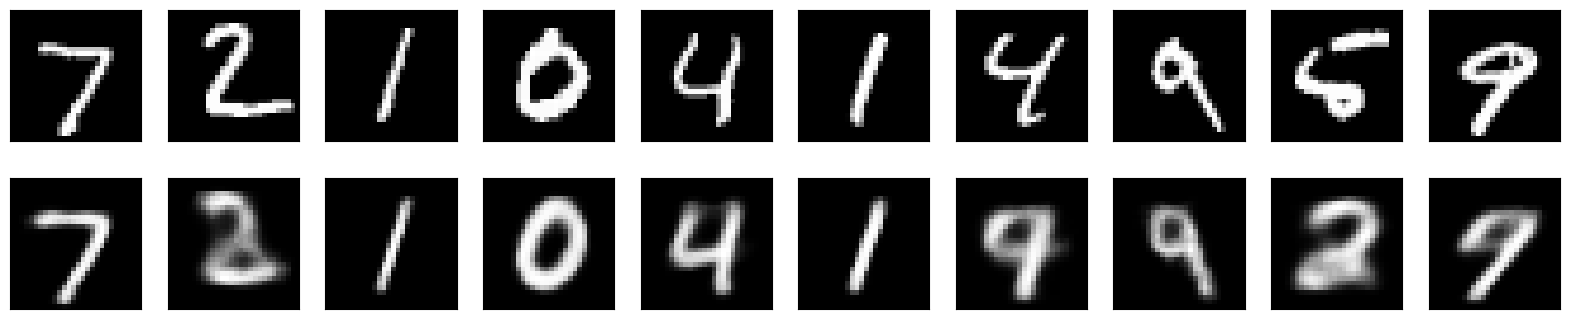

In [14]:
n =10
plt.figure(figsize=(20,4))

for i in range(n):
  # Original
  ax = plt.subplot(2, n, i+1)
  plt.imshow(input_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Reconstructed
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


